In [1]:
import numpy as np
from skimage import io, img_as_ubyte
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
import random
import os
import cv2
import matplotlib.pyplot as plt
import glob

In [2]:
# Imagem original 
if os.path.isdir(r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\012-data-augmentation\images') == False:
    print('A pasta "images" não existe. Criando diretório')
    os.mkdir(r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\012-data-augmentation\images')
else:
    print('A pasta "images" existe')
    images_path = r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\012-data-augmentation\images'

# Imagens modificadas
if os.path.isdir(r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\012-data-augmentation\augmented-images') == False:
    print('A pasta "augmented-images" não existe. Criando um diretório')
    os.mkdir(r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\012-data-augmentation\augmented-images')
else:
    print('A pasta "augmented-images" existe.')
    augmented_path = (r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\012-data-augmentation\augmented-images')

# Imagens Originais
images = glob.glob(images_path + "\*.png")

images_to_generate = 3 # qntd de imagens a serem geradas
i = 1                  # variavel para inteirar

A pasta "images" existe
A pasta "augmented-images" existe.


##### Funções Transformações Geométricas

1. Rotação Anti-Horária
2. Rotação Horária
3. Flip Horizontal
4. Flip Vertical
5. Ruídos de Sal e Pimenta
6. Brilho
7. Median Bluer
8. Zoom

In [3]:
def rotacao_anti(image):
    '''
        Função responsável por fazer a rotação anti-horaria da imagem.
        Entrada: Imagem 
        Saída: Imagem rotacionada entre 0 a 180° no 
    '''
    angle = random.randint(0, 180)
    return rotate(image, angle)


def rotacao_horaria(image):
    '''
        Função responsável por fazer a rotação horaria da imagem.
        Entrada: Imagem 
        Saída: Imagem rotacionada entre 0 a 180° no sentindo horario
    '''
    angle = random.randint(0, 180)
    return rotate(image, -angle)


def h_flip(image):
    '''
        Função responsável por fazer a inversão horizontal da imagem.
        Entrada: Imagem 
        Saída: Imagem invertida no sentido horizontal
    '''
    return np.fliplr(image)


def v_flip(image):
    '''
        Função responsável por fazer a inversão vertical da imagem.
        Entrada: Imagem 
        Saída: Imagem invertida no sentido vertical
    '''
    return np.flipud(image)


def ruidos_img(image):
    '''
        Função responsável por inserir ruídos randomincos do tipo sal e pimenta na imagem.
        Entrada: Imagem 
        Saída: Imagem com ruidos do tipo sal e pimenta
    '''
    return random_noise(image)


def brightness(image):
    '''
        Função responsável por incrementar brilho a imagem.
        Entrada: Imagem 
        Saída: Imagem com brilho
    '''
    bright = np.ones(image.shape, dtype="uint8") * 70
    brightincrease = cv2.add(image, bright)

    return brightincrease

def blur_img(image):
    '''
        Função responsável por aplicar um filtro mediana na imagem.
        Entrada: Imagem 
        Saída: Imagem com filtro mediana    
    '''

    k_size = random.randrange(1,10,2)
    img_blur = cv2.medianBlur(image, k_size)
    return img_blur

def zoom(image):
    '''
    Função responsável por aplicar zoom na imagem.
    Entrada: Imagem
    Saída: Imagem com zoom
    '''
    zoom_value = random.random()
    hidth, width = image.shape[:2]
    h_taken = int(zoom_value*hidth)
    w_taken = int(zoom_value*width)
    h_start = random.randint(0, hidth-h_taken)
    w_start = random.randint(0, width-w_taken)
    image = image[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    image = cv2.resize(image, (hidth, width), cv2.INTER_CUBIC)
    return image

##### Dicionário com as funções criadas

In [4]:
transformations = {'Rotacao anti-horaria': rotacao_anti,
                   'Rotacao horaria': rotacao_horaria,
                   'Horizontal flip': h_flip,
                   'Vertical flip': v_flip,
                   'Ruidos': ruidos_img,
                   'Brilho': brightness,
                   'Blur Image': blur_img,
                   'Zoom': zoom
                   }

In [5]:
while i <= images_to_generate:
    image = random.choice(images)
    original_image = io.imread(image)
    transformed_image = []
#     print(i)
    n = 0       # variável para iterar até o número de transformação 
    # escolha um número aleatório de transformação para aplicar na imagem
    transformation_count = random.randint(1, len(transformations))

    while n <= transformation_count:
        # Escolha aleatorio do metodo a ser aplicado
        key = random.choice(list(transformations))
        print(f'A imagem {i} sofreu as seguintes trasnformações geometricas: {key}')
        transformed_image = transformations[key](original_image)
        n += 1

    new_image_path = "%s/augmented_image_%s.jpg" % (augmented_path, i)
    # Converta uma imagem para o formato de byte sem sinal, com valores em [0, 255].
    transformed_image = img_as_ubyte(transformed_image)
    # converter a imagem antes d egravar
    transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)
    # Salvar a imagem ja convertida
    cv2.imwrite(new_image_path, transformed_image)
    i = i+1

A imagem 1 sofreu as seguintes trasnformações geometricas: Horizontal flip
A imagem 1 sofreu as seguintes trasnformações geometricas: Rotacao anti-horaria
A imagem 1 sofreu as seguintes trasnformações geometricas: Blur Image
A imagem 1 sofreu as seguintes trasnformações geometricas: Rotacao anti-horaria
A imagem 1 sofreu as seguintes trasnformações geometricas: Rotacao anti-horaria
A imagem 2 sofreu as seguintes trasnformações geometricas: Zoom
A imagem 2 sofreu as seguintes trasnformações geometricas: Ruidos
A imagem 2 sofreu as seguintes trasnformações geometricas: Rotacao anti-horaria
A imagem 2 sofreu as seguintes trasnformações geometricas: Rotacao horaria
A imagem 2 sofreu as seguintes trasnformações geometricas: Rotacao horaria
A imagem 2 sofreu as seguintes trasnformações geometricas: Vertical flip
A imagem 2 sofreu as seguintes trasnformações geometricas: Zoom
A imagem 2 sofreu as seguintes trasnformações geometricas: Ruidos
A imagem 3 sofreu as seguintes trasnformações geomet

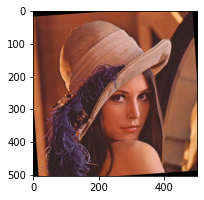

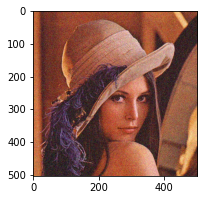

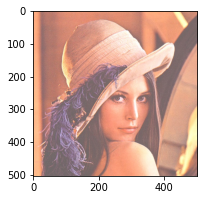

In [6]:
augmented_images1 = glob.glob(augmented_path + "\*.jpg")
for image in range(len(augmented_images1)):
    fig = plt.figure(figsize=(10,6))
    plt.subplot(1, 3, image+1)
    novas_imagens = plt.imread(augmented_images1[image])
    plt.imshow(novas_imagens)